<a href="https://colab.research.google.com/github/fdavenport/CIVE480A6-climate-change-impacts/blob/main/lectures/05_Analyzing_the_Hydrologic_Cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIVE 480A6: Climate Change Risks and Impacts
## Week 6: Analyzing the Hydrologic Cycle - Precipitation patterns

Today's Objectives:
1. Analyze daily precipitation patterns to see how precipitation is changing.
2. Learn how to calculate summary statistics like seasonal patterns or biggest rain event of the year (annual maximum).
3. Learn how to use "for loops" in python.

## Part 1: Daily Precipitation Data

Today we will be looking at daily precipitation data. This data comes from the [Global Historical climatology Network (GHCN-D)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily).  

<img src="https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/main/lectures/img/ghcn_precip_station_map.png" width="700">

We will be looking specifically at data from a weather station at the airport in St. Louis, Missouri.

<img src="https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/main/lectures/img/st_louis_map.png" width="400">

In [1]:
# The data has already been added to the course github page at the following link:

stl_precip_data_url = "https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/refs/heads/main/lectures/data/USW00013994_st_louis_precip.csv"


In [2]:
# we are working with tabular data in a .csv file, so we need to import the pandas library
import pandas as pd


In [3]:
# read in the data
stl_data = pd.read_csv(stl_precip_data_url)


In [4]:
stl_data

,STATION,DATE,PRCP_mm
0,USW00013994,1950-01-01,0.0
1,USW00013994,1950-01-02,9.9
2,USW00013994,1950-01-03,105.7
3,USW00013994,1950-01-04,19.1
4,USW00013994,1950-01-05,3.0
...,...,...,...
27023,USW00013994,2023-12-27,8.4
27024,USW00013994,2023-12-28,3.0
27025,USW00013994,2023-12-29,1.3
27026,USW00013994,2023-12-30,0.0


In [5]:
pd.to_datetime(stl_data["DATE"])

,DATE
0,1950-01-01
1,1950-01-02
2,1950-01-03
3,1950-01-04
4,1950-01-05
...,...
27023,2023-12-27
27024,2023-12-28
27025,2023-12-29
27026,2023-12-30


In [6]:
# add some columns with information about the date

stl_data["DATE"] = pd.to_datetime(stl_data["DATE"])

stl_data["year"] = stl_data["DATE"].dt.year
stl_data["month"] = stl_data["DATE"].dt.month
stl_data["month_name"] = stl_data["DATE"].dt.month_name()

stl_data.set_index("DATE", inplace=True)


In [7]:
stl_data

,STATION,PRCP_mm,year,month,month_name
DATE,,,,,
1950-01-01,USW00013994,0.0,1950,1,January
1950-01-02,USW00013994,9.9,1950,1,January
1950-01-03,USW00013994,105.7,1950,1,January
1950-01-04,USW00013994,19.1,1950,1,January
1950-01-05,USW00013994,3.0,1950,1,January
...,...,...,...,...,...
2023-12-27,USW00013994,8.4,2023,12,December
2023-12-28,USW00013994,3.0,2023,12,December
2023-12-29,USW00013994,1.3,2023,12,December


In [8]:
stl_data["2002-01-01":"2002-12-31"]

,STATION,PRCP_mm,year,month,month_name
DATE,,,,,
2002-01-01,USW00013994,0.0,2002,1,January
2002-01-02,USW00013994,0.0,2002,1,January
2002-01-03,USW00013994,0.0,2002,1,January
2002-01-04,USW00013994,0.0,2002,1,January
2002-01-05,USW00013994,2.3,2002,1,January
...,...,...,...,...,...
2002-12-27,USW00013994,0.0,2002,12,December
2002-12-28,USW00013994,0.0,2002,12,December
2002-12-29,USW00013994,0.0,2002,12,December


In [9]:
# we will use the same plotting package as before

import matplotlib.pyplot as plt


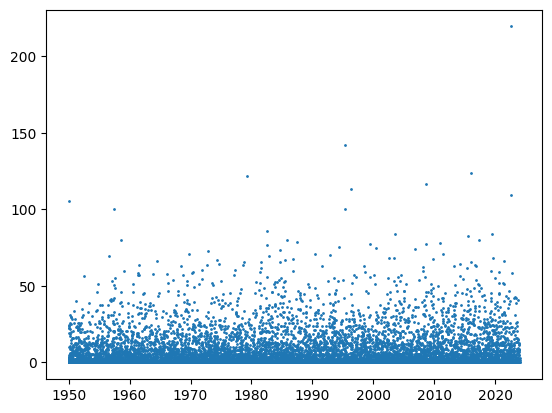

In [10]:
# make a plot of the data

fig, ax = plt.subplots()

ax.scatter(x = stl_data.index, y = stl_data["PRCP_mm"], s = 1)


In [11]:
# get a summary of the data

stl_data.describe()

,PRCP_mm,year,month
count,27028.000000,27028.000000,27028.000000
mean,2.687894,1986.499667,6.523013
std,7.894123,21.360010,3.448744
min,0.000000,1950.000000,1.000000
25%,0.000000,1968.000000,4.000000
50%,0.000000,1986.500000,7.000000
75%,0.800000,2005.000000,10.000000
max,219.500000,2023.000000,12.000000


Text(0, 0.5, 'number of days')

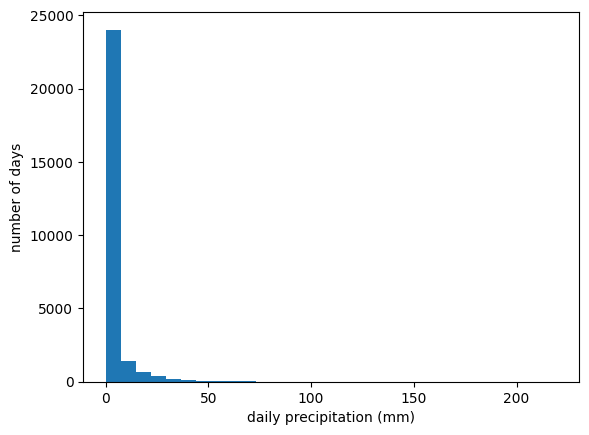

In [12]:
# create a histogram of the daily precipitation data

fig, ax = plt.subplots()

ax.hist(x = stl_data["PRCP_mm"], bins = 30)
ax.set_xlabel("daily precipitation (mm)")
ax.set_ylabel("number of days")

## Part 2: Seasonal precipitation patterns

Next, we are going to calculate the average amount of precipitation during each month of the year, and look at how that has changed over time

In [13]:
## create an empty table ("dataframe") to hold the information we calculate

month_averages = pd.DataFrame(columns = ["month", "average_precip"], index = range(12))

month_averages

,month,average_precip
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [14]:
## calculate mean daily precipitation for the month of january

## subset the data for only days in January
data_jan = stl_data.loc[stl_data["month_name"] == "January"]

## calculate the mean
data_jan["PRCP_mm"].mean()

1.7928509154315606

In [15]:
## save our calculation in our month_averages data frame

month_averages.loc[0, "month"] = "January"
month_averages.loc[0, "average_precip"] = data_jan["PRCP_mm"].mean()

In [16]:
## looks good so far!

month_averages

,month,average_precip
0,January,1.792851
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


We don't want to have to do these steps for every single month - that might take a while, and if we have to type things 12 times, we're more likely to make an error. Instead, we can use something called a "for loop" to repeat our calculations:

In [17]:
x = 100

## define the for loop. this says that i starts and 0 and goes to 10.
## for every value of i, the code in the loop is run
for i in range(0, 10):
  # code inside the loop needs to be indented by four spaces
  print(i)
  x = x+i
  print("x = ", x)



0
x =  100
1
x =  101
2
x =  103
3
x =  106
4
x =  110
5
x =  115
6
x =  121
7
x =  128
8
x =  136
9
x =  145


In [18]:
## make a list of all of the months that we want to loop through
month_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

month_list

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [19]:
## test looping through our list of months.
## the value of m will change for each loop iteration until it has gone through all of the values in month_list
for m in month_list:
  print(m)

January
February
March
April
May
June
July
August
September
October
November
December


In [20]:
## add the enumerate function so that we can keep track of the loop number while we are looping through the months

for i, m in enumerate(month_list):
  print("i = ", i, ", month = ", m)

i =  0 , month =  January
i =  1 , month =  February
i =  2 , month =  March
i =  3 , month =  April
i =  4 , month =  May
i =  5 , month =  June
i =  6 , month =  July
i =  7 , month =  August
i =  8 , month =  September
i =  9 , month =  October
i =  10 , month =  November
i =  11 , month =  December


In [21]:
## now, let's loop through, calculate the mean precipitation and save to our dataframe

for i, m in enumerate(month_list):
    data_month = stl_data.loc[stl_data["month_name"] == m]
    month_averages.loc[i, "month"] = m
    month_averages.loc[i, "average_precip"] = data_month["PRCP_mm"].mean()

In [22]:
month_averages

,month,average_precip
0,January,1.792851
1,February,2.020144
2,March,2.848779
3,April,3.380766
4,May,3.442633
5,June,3.473694
6,July,3.271752
7,August,2.513208
8,September,2.414054
9,October,2.32197


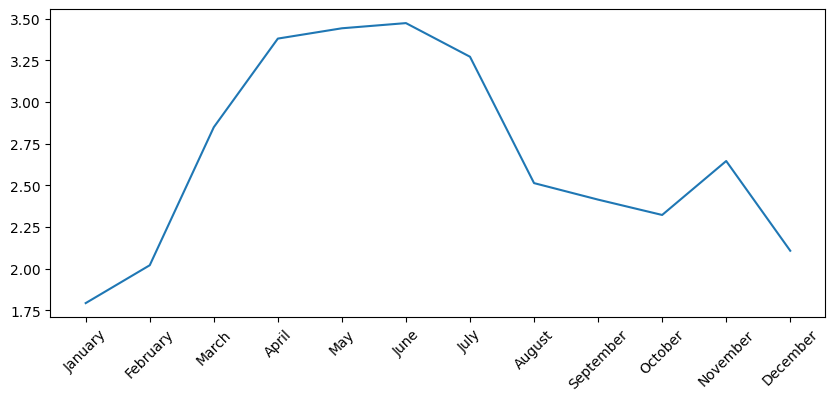

In [23]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(month_averages["month"],
        month_averages["average_precip"])

plt.xticks(rotation=45);

In [24]:
data_early = stl_data["1950":"1989"]
data_early

data_late = stl_data["1990":"2023"]
data_late

,STATION,PRCP_mm,year,month,month_name
DATE,,,,,
1990-01-01,USW00013994,0.3,1990,1,January
1990-01-02,USW00013994,0.0,1990,1,January
1990-01-03,USW00013994,4.1,1990,1,January
1990-01-04,USW00013994,0.0,1990,1,January
1990-01-05,USW00013994,0.0,1990,1,January
...,...,...,...,...,...
2023-12-27,USW00013994,8.4,2023,12,December
2023-12-28,USW00013994,3.0,2023,12,December
2023-12-29,USW00013994,1.3,2023,12,December


In [25]:
month_averages_early = pd.DataFrame(columns = ["month", "average_precip"], index=range(12))
month_averages_early

month_averages_late = pd.DataFrame(columns = ["month", "average_precip"], index = range(12))

In [26]:
for i, m in enumerate(month_list):
    data_month = data_early.loc[data_early["month_name"] == m]
    month_averages_early.loc[i, "month"] = m
    month_averages_early.loc[i, "average_precip"] = data_month["PRCP_mm"].mean()

    data_month = data_late.loc[data_late["month_name"] == m]
    month_averages_late.loc[i, "month"] = m
    month_averages_late.loc[i, "average_precip"] = data_month["PRCP_mm"].mean()



In [27]:
month_averages_early

,month,average_precip
0,January,1.543145
1,February,1.988938
2,March,2.759113
3,April,2.975
4,May,2.988226
5,June,3.296667
6,July,3.098306
7,August,2.225
8,September,2.4105
9,October,2.082661


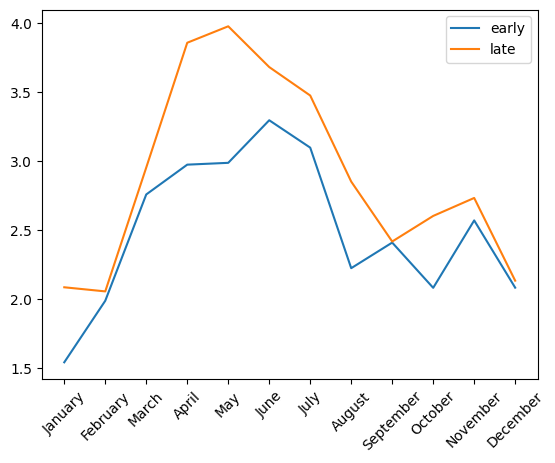

In [28]:
fig, ax = plt.subplots()

ax.plot(month_averages_early["month"], month_averages_early["average_precip"], label = "early")
ax.plot(month_averages_late["month"], month_averages_late["average_precip"], label = "late")

plt.xticks(rotation=45)
plt.legend()

In [29]:
month_averages_late["average_precip"] - month_averages_early["average_precip"]

,average_precip
0,0.543477
1,0.067937
2,0.195157
3,0.883137
4,0.989004
5,0.385294
6,0.3775
7,0.627277
8,0.007735
9,0.520849


## Part 3: Calculating changes in annual statistics

Next, we are going to calculate the total amount of precipitation each year and the maximum amount falling on a single day. We will then calculate trends in those metrics.

In [30]:
annual_stats = pd.DataFrame(columns = ["year", "total_precip", "max_precip", "day_of_max"], index = range(74))
annual_stats

,year,total_precip,max_precip,day_of_max
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
69,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN


In [31]:
stl_data["1950":"1950"]

,STATION,PRCP_mm,year,month,month_name
DATE,,,,,
1950-01-01,USW00013994,0.0,1950,1,January
1950-01-02,USW00013994,9.9,1950,1,January
1950-01-03,USW00013994,105.7,1950,1,January
1950-01-04,USW00013994,19.1,1950,1,January
1950-01-05,USW00013994,3.0,1950,1,January
...,...,...,...,...,...
1950-12-27,USW00013994,0.0,1950,12,December
1950-12-28,USW00013994,0.0,1950,12,December
1950-12-29,USW00013994,0.0,1950,12,December


In [32]:
yr = 1950
stl_data[str(1950):str(1950)]

,STATION,PRCP_mm,year,month,month_name
DATE,,,,,
1950-01-01,USW00013994,0.0,1950,1,January
1950-01-02,USW00013994,9.9,1950,1,January
1950-01-03,USW00013994,105.7,1950,1,January
1950-01-04,USW00013994,19.1,1950,1,January
1950-01-05,USW00013994,3.0,1950,1,January
...,...,...,...,...,...
1950-12-27,USW00013994,0.0,1950,12,December
1950-12-28,USW00013994,0.0,1950,12,December
1950-12-29,USW00013994,0.0,1950,12,December


In [33]:
for i, yr in enumerate(range(1950, 2024)):
  #print(yr)
  data_yr = stl_data[str(yr):str(yr)]
  annual_stats.loc[i, "year"] = yr
  # use sum function to calculate total precipitation during the year
  annual_stats.loc[i, "total_precip"] = data_yr["PRCP_mm"].sum()

  # use max function to find maximum precipitation value during the year
  annual_stats.loc[i, "max_precip"] = data_yr["PRCP_mm"].max()

  # use argmax function to find the row with the maximum precipitation value
  annual_stats.loc[i, "day_of_max"] = pd.to_datetime(data_yr.index[data_yr["PRCP_mm"].argmax()])

annual_stats

,year,total_precip,max_precip,day_of_max
0,1950,956.8,105.7,1950-01-03 00:00:00
1,1951,923.3,40.4,1951-02-20 00:00:00
2,1952,652.5,56.4,1952-07-16 00:00:00
3,1953,523.0,38.6,1953-04-23 00:00:00
4,1954,701.9,51.1,1954-10-11 00:00:00
...,...,...,...,...
69,2019,1372.2,83.8,2019-07-22 00:00:00
70,2020,1270.4,59.4,2020-07-30 00:00:00
71,2021,1079.8,66.5,2021-06-25 00:00:00
72,2022,1243.7,219.5,2022-07-26 00:00:00


In [34]:
stl_data["PRCP_mm"].max()

219.5

In [35]:
stl_data["PRCP_mm"].argmax()

26504

In [38]:
stl_data.iloc[26504]

,2022-07-26
STATION,USW00013994
PRCP_mm,219.5
year,2022
month,7
month_name,July


In [39]:
stl_data.index[stl_data["PRCP_mm"].argmax()]

Timestamp('2022-07-26 00:00:00')

Let's make a plot of total annual precipitation over time at the St. Louis station. We can also calculate the trend in total annual precipitation:

In [ ]:
from scipy import stats

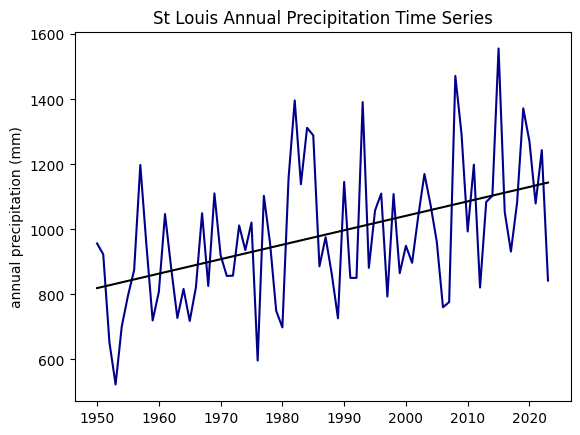

In [ ]:
fig, ax = plt.subplots()

ax.plot(annual_stats["year"], annual_stats["total_precip"], color = "darkblue")

trend = stats.linregress(annual_stats["year"].astype("float"), annual_stats["total_precip"].astype("float"))
ax.plot(annual_stats["year"], annual_stats["year"]*trend.slope+trend.intercept, color = "black")

ax.set_ylabel("annual precipitation (mm)")
ax.set_title("St Louis Annual Precipitation Time Series");

In [ ]:
print("The magnitude of the trend in annual precipitation is", round(trend.slope, 3), "mm per year.")
print("The p-value is", trend.pvalue)
print("Over 74 years, annual precipitation has increased by", trend.slope*74,"mm.")

The magnitude of the trend in annual precipitation is 4.447 mm per year.
The p-value is 5.645563401570164e-05
Over 74 years, annual precipitation has increased by 329.04657534246564 mm.


Let's make a time series plot of the wettest day of the year:

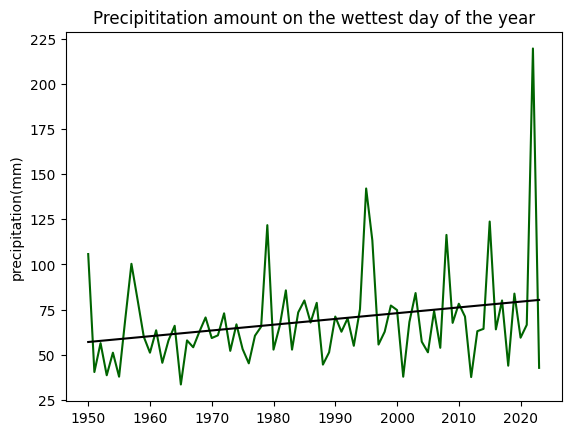

In [ ]:
fig, ax = plt.subplots()

ax.plot(annual_stats["year"], annual_stats["max_precip"], color = "darkgreen")

max_trend = stats.linregress(annual_stats["year"].astype("float"), annual_stats["max_precip"].astype("float"))
ax.plot(annual_stats["year"], annual_stats["year"]*max_trend.slope+max_trend.intercept, color = "black")

ax.set_ylabel("precipitation(mm)")
ax.set_title("Precipititation amount on the wettest day of the year");

In [ ]:
print("The magnitude of the trend in annual precipitation is", round(max_trend.slope, 3), "mm per year.")
print("The p-value is", max_trend.pvalue)
print("Over 74 years, precipitation on the wettest day of the year has increased by", max_trend.slope*74,"mm.")

The magnitude of the trend in annual precipitation is 0.319 mm per year.
The p-value is 0.03193886850006496
Over 74 years, precipitation on the wettest day of the year has increased by 23.606465753424658 mm.


We can also look at when the wettest days of the year occur.

In [ ]:
## add column showing which month the wettest day occured in

annual_stats["month_of_max"] = pd.to_datetime(annual_stats["day_of_max"]).dt.month

## print out the top of the annual_stats table to check
annual_stats.head()

,year,total_precip,max_precip,day_of_max,month_of_max
0,1950,956.8,105.7,1950-01-03 00:00:00,1
1,1951,923.3,40.4,1951-02-20 00:00:00,2
2,1952,652.5,56.4,1952-07-16 00:00:00,7
3,1953,523.0,38.6,1953-04-23 00:00:00,4
4,1954,701.9,51.1,1954-10-11 00:00:00,10


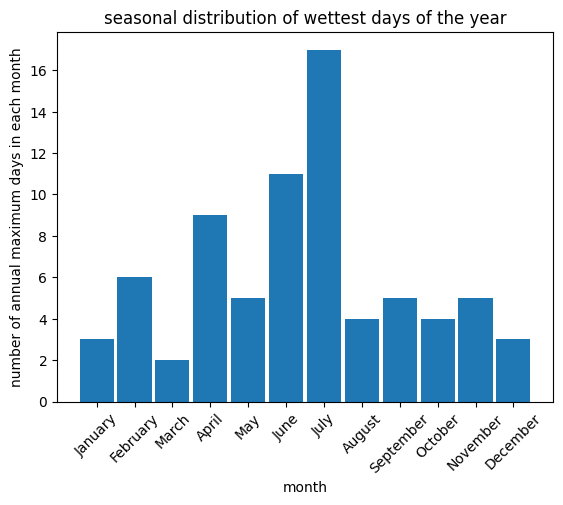

In [ ]:
## make a histogram of the month when the wettest day occurs

fig, ax = plt.subplots()

ax.hist(annual_stats["month_of_max"], bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5],
        rwidth = 0.9)
ax.set_ylabel("number of annual maximum days in each month")
plt.title("seasonal distribution of wettest days of the year")
ax.set_xlabel("month")
ax.set_xticks(labels = month_list, ticks = range(1, 13), rotation = 45);